In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [12]:
# testing code source
import sys
sys.path.append("..")

In [13]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

import seaborn
import matplotlib.pyplot as plt

In [14]:
network = '../docs/networks/metabolic_network3.tsv'
data = atlas.read_network(network)

In [15]:
model = atlas.construct_model_from_metabolic_network(network, verbose = False)

In [16]:
# model initial condition
simulation.set_initial.met(model, 'beta_lactose', 'per', 100)
simulation.set_initial.met(model, 'PROTON', 'per', 100)
simulation.set_initial.met(model, 'WATER', 'cyt', 100)

if 'network1' in network:
    simulation.set_initial.cplx(model, 'BETAGALACTOSID_CPLX', 'cyt', 1)
    simulation.set_initial.cplx(model, 'GALACTOACETYLTRAN_CPLX', 'cyt', 1)
    simulation.set_initial.cplx(model, 'LACY_MONOMER', 'mem', 1)

if 'network2' in network:
    simulation.set_initial.prot(model, 'lacZ', 'cyt', 1)
    simulation.set_initial.prot(model, 'lacA', 'cyt', 1)
    simulation.set_initial.prot(model, 'lacY', 'mem', 1)

if 'network3' in network:
    simulation.set_initial.prot(model, 'lacY', 'mem', 1)
    simulation.set_initial.pattern(model, 
        "prot(name='lacZ', loc='cyt', prot = None, up=None, dw=1) % " + \
        "prot(name='lacZ', loc='cyt', prot = None, up=1, dw=2) % " + \
        "prot(name='lacZ', loc='cyt', prot = None, up=2, dw=3) % " + \
        "prot(name='lacZ', loc='cyt', prot = None, up=3, dw=None)", 
        'galactosidase', 1)
    simulation.set_initial.pattern(model, 
        "prot(name='lacA', loc='cyt', prot = None, up=None, dw=1) % " + \
        "prot(name='lacA', loc='cyt', prot = None, up=1, dw=2) % " + \
        "prot(name='lacA', loc='cyt', prot = None, up=2, dw=None)",
        'acetyltransferase', 1)

In [17]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model, 'test.bngl', bng)
export.to_kappa(model, 'test.kappa')

In [18]:
data1 = simulation.ode(model, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 2, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model, start = 0, finish = 2, points = 200, n_runs = 20, path = kasim)

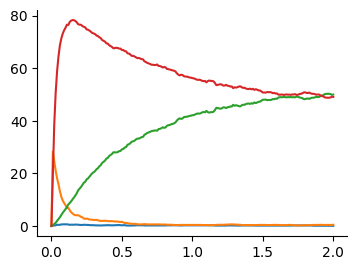

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot(data2['avrg'], 'alpha_lactose', 'cyt')
simulation.plot(data2['avrg'], 'beta_lactose', 'cyt')
simulation.plot(data2['avrg'], 'alpha_GALACTOSE', 'cyt')
simulation.plot(data2['avrg'], 'beta_GALACTOSE', 'cyt')

seaborn.despine()

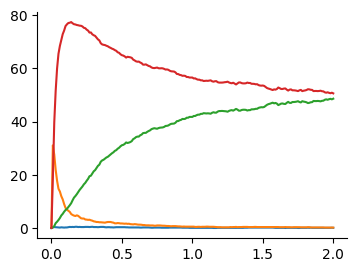

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot(data3['avrg'], 'alpha_lactose', 'cyt')
simulation.plot(data3['avrg'], 'beta_lactose', 'cyt')
simulation.plot(data3['avrg'], 'alpha_GALACTOSE', 'cyt')
simulation.plot(data3['avrg'], 'beta_GALACTOSE', 'cyt')

seaborn.despine()